In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import cvxopt as opt
from cvxopt import blas, solvers
import pandas as pd

np.random.seed(123)

# Turn off progress printing 
solvers.options['show_progress'] = False

In [2]:
import plotly
import cufflinks
plotly.__version__

'5.2.2'

In [3]:
# (*) To communicate with Plotly's server, sign in with credentials file
import plotly.plotly as py  

# (*) Useful Python/Plotly tools
import plotly.tools as tls   

# (*) Graph objects to piece together plots
from plotly.graph_objs import *

ImportError: 
The plotly.plotly module is deprecated,
please install the chart-studio package and use the
chart_studio.plotly module instead. 


In [4]:
## NUMBER OF ASSETS
n_assets = 4

## NUMBER OF OBSERVATIONS
n_obs = 1000

return_vec = np.random.randn(n_assets, n_obs)

In [7]:
return_vec

array([[-1.0856306 ,  0.99734545,  0.2829785 , ..., -0.90932702,
         0.47026375, -1.11143045],
       [-0.74882747,  0.56759473,  0.71815054, ..., -0.35929672,
        -1.60969508,  0.01357006],
       [-1.77422355, -1.20137731,  1.09625679, ...,  2.04043199,
         1.01591697, -1.63378817],
       [-0.45059869,  0.60959032,  1.17374438, ..., -0.1227329 ,
         1.79448602, -0.32050951]])

NameError: name 'py' is not defined

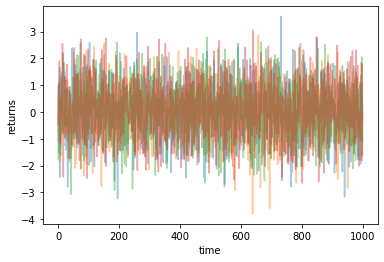

In [8]:
fig = plt.figure()
plt.plot(return_vec.T, alpha=.4);
plt.xlabel('time')
plt.ylabel('returns')
py.iplot_mpl(fig, filename='s6_damped_oscillation')

In [10]:
def rand_weights(n):
    ''' Produces n random weights that sum to 1 '''
    k = np.random.rand(n)
    return k / sum(k)

print(rand_weights(n_assets))
print(rand_weights(n_assets))

[0.54066805 0.2360283  0.11660484 0.1066988 ]
[0.27638339 0.03006307 0.47850085 0.21505269]


In [11]:
def random_portfolio(returns):
    ''' 
    Returns the mean and standard deviation of returns for a random portfolio
    '''

    p = np.asmatrix(np.mean(returns, axis=1))
    w = np.asmatrix(rand_weights(returns.shape[0]))
    C = np.asmatrix(np.cov(returns))
    
    mu = w * p.T
    sigma = np.sqrt(w * C * w.T)
    
    # This recursion reduces outliers to keep plots pretty
    if sigma > 2:
        return random_portfolio(returns)
    return mu, sigma

In [13]:
n_portfolios = 500
means, stds = np.column_stack([
    random_portfolio(return_vec) 
    for _ in range(n_portfolios)
])

NameError: name 'py' is not defined

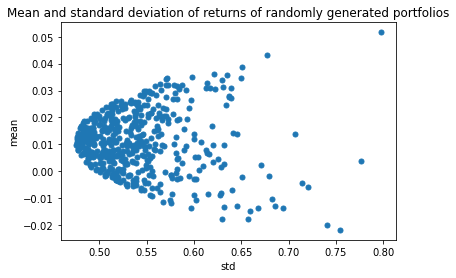

In [14]:
fig = plt.figure()
plt.plot(stds, means, 'o', markersize=5)
plt.xlabel('std')
plt.ylabel('mean')
plt.title('Mean and standard deviation of returns of randomly generated portfolios')
py.iplot_mpl(fig, filename='mean_std', strip_style=True)

NameError: name 'py' is not defined

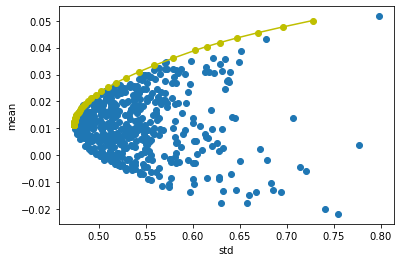

In [15]:
def optimal_portfolio(returns):
    n = len(returns)
    returns = np.asmatrix(returns)
    
    N = 100
    mus = [10**(5.0 * t/N - 1.0) for t in range(N)]
    
    # Convert to cvxopt matrices
    S = opt.matrix(np.cov(returns))
    pbar = opt.matrix(np.mean(returns, axis=1))
    
    # Create constraint matrices
    G = -opt.matrix(np.eye(n))   # negative n x n identity matrix
    h = opt.matrix(0.0, (n ,1))
    A = opt.matrix(1.0, (1, n))
    b = opt.matrix(1.0)
    
    # Calculate efficient frontier weights using quadratic programming
    portfolios = [solvers.qp(mu*S, -pbar, G, h, A, b)['x'] 
                  for mu in mus]
    ## CALCULATE RISKS AND RETURNS FOR FRONTIER
    returns = [blas.dot(pbar, x) for x in portfolios]
    risks = [np.sqrt(blas.dot(x, S*x)) for x in portfolios]
    ## CALCULATE THE 2ND DEGREE POLYNOMIAL OF THE FRONTIER CURVE
    m1 = np.polyfit(returns, risks, 2)
    x1 = np.sqrt(m1[2] / m1[0])
    # CALCULATE THE OPTIMAL PORTFOLIO
    wt = solvers.qp(opt.matrix(x1 * S), -pbar, G, h, A, b)['x']
    return np.asarray(wt), returns, risks

weights, returns, risks = optimal_portfolio(return_vec)

fig = plt.figure()
plt.plot(stds, means, 'o')
plt.ylabel('mean')
plt.xlabel('std')
plt.plot(risks, returns, 'y-o')
py.iplot_mpl(fig, filename='efficient_frontier', strip_style=True)

In [16]:
print(weights)

[[2.77880107e-09]
 [3.20322848e-06]
 [1.54301198e-06]
 [9.99995251e-01]]


In [17]:
sum(weights)

array([1.])

In [20]:
from zipline.utils.factory import load_bars_from_yahoo
end = pd.Timestamp.utcnow()
start = end - 2500 * pd.tseries.offsets.BDay()

data = load_bars_from_yahoo(stocks=['IBM', 'GLD', 'XOM', 'AAPL', 
                                    'MSFT', 'TLT', 'SHY'],
                            start=start, end=end)

ModuleNotFoundError: No module named 'zipline'

In [19]:
!pip install zipline

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\Gabi\anaconda3\python.exe' 'C:\Users\Gabi\anaconda3\lib\site-packages\pip' install --ignore-installed --no-user --prefix 'C:\Users\Gabi\AppData\Local\Temp\pip-build-env-tewf4qwb\overlay' --no-warn-script-location --no-binary :none: --only-binary :none: -i https://pypi.org/simple -- wheel setuptools Cython 'numpy==1.9.3; python_version=='"'"'3.5'"'"'' 'numpy==1.12.1; python_version=='"'"'3.6'"'"'' 'numpy==1.13.1; python_version>='"'"'3.7'"'"''
       cwd: None
  Complete output (363 lines):
  Ignoring numpy: markers 'python_version == "3.5"' don't match your environment
  Ignoring numpy: markers 'python_version == "3.6"' don't match your environment


  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Installing build dependencies: started
  Installing build dependencies: finished with status 'error'
  Running setup.py clean for zipline
  Running setup.py clean for bcolz
  Created wheel for empyrical: filename=empyrical-0.5.5-py3-none-any.whl size=39777 sha256=396f99c41343e2f383ec91752521c855408909bdc434f73783810394075efdb1
  Stored in directory: c:\users\gabi\appdata\local\pip\cache\wheels\0d\68\bb\926065fb744e7d7cb67334cb1a9c696722abc8303e5dc9a8d0
  Created wheel for Logbook: filename=Logbook-1.5.3-cp38-cp38-win_amd64.whl size=66379 sha256=5aac79d4236b36cd2ce51d8e3c17fb40d28dbe30033fbeb80316e7b01eedad1a
  Stored in directory: c:\users\gabi\appdata\local\pip\cache\wheels\25\9a\c0\03bf368ac5f673e9c0bde58837146b004424b25555ca3aedfb
  Running setup.py clean for lru-dict
  Running


    ERROR: Command errored out with exit status 1:
     command: 'C:\Users\Gabi\anaconda3\python.exe' -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\Gabi\\AppData\\Local\\Temp\\pip-install-v593syu3\\numpy_76149b14e03349f7b7b1ae7814bd8d4e\\setup.py'"'"'; __file__='"'"'C:\\Users\\Gabi\\AppData\\Local\\Temp\\pip-install-v593syu3\\numpy_76149b14e03349f7b7b1ae7814bd8d4e\\setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\Gabi\AppData\Local\Temp\pip-wheel-o9dnsnsu'
         cwd: C:\Users\Gabi\AppData\Local\Temp\pip-install-v593syu3\numpy_76149b14e03349f7b7b1ae7814bd8d4e\
    Complete output (157 lines):
    Running from numpy source directory.
    C:\Users\Gabi\AppData\Local\Temp\pip-install-v593syu3\numpy_76149b14e03349f7b7b1ae7814bd8d4e\numpy\distutils\misc_util.py:469: SyntaxWarning: "is" with a literal. Did you mean 

        self.calc_info()
      blas_src_info:
        NOT AVAILABLE
  
      C:\Users\Gabi\AppData\Local\Temp\pip-install-t17a4wjy\numpy_da8fe10111394469a4656e7a86ad8064\numpy\distutils\system_info.py:572: UserWarning:
          Blas (http://www.netlib.org/blas/) sources not found.
          Directories to search for the sources can be specified in the
          numpy/distutils/site.cfg file (section [blas_src]) or by setting
          the BLAS_SRC environment variable.
        self.calc_info()
        NOT AVAILABLE
  
      'svnversion' nÆo ‚ reconhecido como um comando interno
      ou externo, um programa oper vel ou um arquivo em lotes.
      'svnversion' nÆo ‚ reconhecido como um comando interno
      ou externo, um programa oper vel ou um arquivo em lotes.
      non-existing path in 'numpy\\distutils': 'site.cfg'
      F2PY Version 2
      lapack_opt_info:
      lapack_mkl_info:
        libraries mkl_rt not found in ['C:\\Users\\Gabi\\anaconda3\\lib', 'C:\\', 'C:\\Users\\Gabi\\an

  creating build\lib.win-amd64-3.8\pandas\tests\indexes\data
  copying pandas\tests\indexes\data\mindex_073.pickle -> build\lib.win-amd64-3.8\pandas\tests\indexes\data
  copying pandas\tests\indexes\data\multiindex_v1.pickle -> build\lib.win-amd64-3.8\pandas\tests\indexes\data
  creating build\lib.win-amd64-3.8\pandas\tests\io\data
  creating build\lib.win-amd64-3.8\pandas\tests\io\data\legacy_hdf
  copying pandas\tests\io\data\legacy_hdf\datetimetz_object.h5 -> build\lib.win-amd64-3.8\pandas\tests\io\data\legacy_hdf
  copying pandas\tests\io\data\legacy_hdf\legacy_0.10.h5 -> build\lib.win-amd64-3.8\pandas\tests\io\data\legacy_hdf
  copying pandas\tests\io\data\legacy_hdf\legacy_table.h5 -> build\lib.win-amd64-3.8\pandas\tests\io\data\legacy_hdf
  copying pandas\tests\io\data\legacy_hdf\legacy_table_0.11.h5 -> build\lib.win-amd64-3.8\pandas\tests\io\data\legacy_hdf
  copying pandas\tests\io\data\legacy_hdf\periodindex_0.20.1_x86_64_darwin_2.7.13.h5 -> build\lib.win-amd64-3.8\pandas\tes

  skipping 'pandas\_libs\reshape.c' Cython extension (up-to-date)
  cythoning pandas\_libs/interval.pyx to pandas\_libs\interval.c
  C:\Users\Gabi\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Gabi\AppData\Local\Temp\pip-install-on6s4g98\pandas_7050a2313da442c095a7d46d867b8ef7\pandas\_libs\interval.pyx
    tree = Parsing.p_module(s, pxd, full_module_name)
  skipping 'pandas\_libs\window.c' Cython extension (up-to-date)
  skipping 'pandas\_libs\parsers.c' Cython extension (up-to-date)
  skipping 'pandas\_libs\sparse.c' Cython extension (up-to-date)
  skipping 'pandas\_libs\testing.c' Cython extension (up-to-date)
  skipping 'pandas\_libs\hashing.c' Cython extension (up-to-date)
  skipping 'pandas\io/sas\sas.c' Cython extension (up-to-date)
  skipping 'pandas\io/msgpack\_packer.cpp' Cython extension (up-to-date)
  skipping 'pandas\io/msgpack\_unp

    cythoning pandas\_libs/tslib.pyx to pandas\_libs\tslib.c
    C:\Users\Gabi\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Gabi\AppData\Local\Temp\pip-install-on6s4g98\pandas_7050a2313da442c095a7d46d867b8ef7\pandas\_libs\tslib.pxd
      tree = Parsing.p_module(s, pxd, full_module_name)
    cythoning pandas\_libs/period.pyx to pandas\_libs\period.c
    C:\Users\Gabi\anaconda3\lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_level' not set, using 2 for now (Py2). This will change in a later release! File: C:\Users\Gabi\AppData\Local\Temp\pip-install-on6s4g98\pandas_7050a2313da442c095a7d46d867b8ef7\pandas\_libs\period.pyx
      tree = Parsing.p_module(s, pxd, full_module_name)
    cythoning pandas\_libs/index.pyx to pandas\_libs\index.c
    C:\Users\Gabi\anaconda3\lib\site-packages\Cython\Compiler\Main.py:

In [25]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as sco
import seaborn as sn
from math import sqrt
from pandas_datareader import data as dt
import scipy
from scipy.optimize import minimize
import datetime
import cvxopt as co
from cvxopt import blas, solvers

In [26]:
# Definindo o dataframe de dados de preço de ativos do portfólio:
precos = pd.DataFrame()

# Definindo o período a ser utilizado
inicio = datetime.datetime(2018, 1, 1)
final = datetime.datetime(2021, 7, 1)

# Definindo os ativos a serem utilizados (Indice BOVESPA):
acoes = ["ABEV3.SA" , "AZUL4.SA" , "B3SA3.SA" , "BBAS3.SA" , "BBDC3.SA",  "BBDC4.SA" , "BBSE3.SA" , "BEEF3.SA", 
"BPAC11.SA", "BRAP4.SA"]


for i in acoes:
    precos[i] = dt.get_data_yahoo(i, start = inicio, end = final)['Close']
    
precos.dropna(inplace=True)

In [27]:
df = precos
retornos = df.pct_change() 
media_retornos = retornos.mean()
sigma = retornos.cov()

In [28]:
corrMatrix = retornos.corr()
corrMatrix

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA
ABEV3.SA,1.000000,0.478372,0.432102,0.475034,0.533124,0.521945,0.423569,0.242748,0.387842,0.297080
AZUL4.SA,0.478372,1.000000,0.528290,0.613468,0.589053,0.603348,0.426515,0.256292,0.520174,0.343426
B3SA3.SA,0.432102,0.528290,1.000000,0.654573,0.650345,0.623108,0.565007,0.289386,0.578451,0.400882
BBAS3.SA,0.475034,0.613468,0.654573,1.000000,0.845980,0.845874,0.586406,0.236245,0.558975,0.400974
BBDC3.SA,0.533124,0.589053,0.650345,0.845980,1.000000,0.953554,0.626675,0.239593,0.572225,0.436911
BBDC4.SA,0.521945,0.603348,0.623108,0.845874,0.953554,1.000000,0.600686,0.236432,0.560263,0.420798
BBSE3.SA,0.423569,0.426515,0.565007,0.586406,0.626675,0.600686,1.000000,0.152268,0.467460,0.336360
BEEF3.SA,0.242748,0.256292,0.289386,0.236245,0.239593,0.236432,0.152268,1.000000,0.256050,0.280258
BPAC11.SA,0.387842,0.520174,0.578451,0.558975,0.572225,0.560263,0.467460,0.256050,1.000000,0.338228
BRAP4.SA,0.297080,0.343426,0.400882,0.400974,0.436911,0.420798,0.336360,0.280258,0.338228,1.000000


In [29]:
taxa_livre_risco = ((1 + 0.0575)**(1/252))-1 
taxa_livre_risco

0.00022188029408676258

In [30]:
retornos

,ABEV3.SA,AZUL4.SA,B3SA3.SA,BBAS3.SA,BBDC3.SA,BBDC4.SA,BBSE3.SA,BEEF3.SA,BPAC11.SA,BRAP4.SA
Date,,,,,,,,,,
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.002305,-0.003315,0.017023,0.012754,0.003718,0.004046,0.000697,-0.007346,0.009524,0.009453
2018-01-04,-0.005520,0.006282,0.006438,0.009595,0.018210,0.016408,0.002089,-0.003700,0.003669,0.028428
2018-01-05,0.003700,-0.001102,0.014499,0.000000,0.000303,0.005664,0.006602,0.011142,-0.019843,0.024065
2018-01-08,-0.001843,-0.010662,0.004624,0.002376,0.000000,-0.000282,0.005868,-0.033976,0.012254,0.017466
...,...,...,...,...,...,...,...,...,...,...
2021-06-25,-0.055710,-0.021915,-0.017657,-0.030071,-0.025585,-0.031204,-0.019672,-0.013211,-0.017691,0.042814
2021-06-28,0.032448,-0.013922,0.017975,-0.007599,-0.007566,-0.004926,0.007525,-0.010299,0.031200,-0.004927
2021-06-29,-0.012000,-0.017648,0.002943,-0.006738,-0.008520,-0.006093,-0.014938,-0.016649,0.006068,0.026406


In [32]:
retornos.values.tolist()

[[nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
 [0.0023051745426210246,
  -0.003314922793828168,
  0.017023150873270776,
  0.012754271638415249,
  0.0037175163242388898,
  0.004046228061553414,
  0.0006968135847877921,
  -0.007346211818134218,
  0.009523825862901125,
  0.009453030768520554],
 [-0.00551973013560858,
  0.00628233849405313,
  0.006437793404530989,
  0.009595193687116144,
  0.018209865051238117,
  0.016407556970849946,
  0.0020891843567389934,
  -0.003700244155822263,
  0.003668747122857585,
  0.02842810676636076],
 [0.003700273848319169,
  -0.00110168122663179,
  0.014498982079685696,
  0.0,
  0.0003031642293174208,
  0.0056641199460694125,
  0.006601758935924851,
  0.011142050494983513,
  -0.01984329860763545,
  0.024065033207094855],
 [-0.001843360097740665,
  -0.010661798065920491,
  0.0046237571341425365,
  0.002376056887596567,
  0.0,
  -0.00028154852625339455,
  0.005868142227244633,
  -0.03397612946503792,
  0.012253571477202296,
  0.017465898647405664],
 [-0

In [70]:
ativo_1 = retornos["ABEV3.SA"].to_numpy()`

In [71]:
ativo_1

array([        nan,  0.00230517, -0.00551973,  0.00370027, -0.00184336,
       -0.00277006,  0.        ,  0.01157407, -0.01144165,  0.01018515,
        0.00366636,  0.00593612, -0.00499322,  0.00364963, -0.00454547,
       -0.00365296,  0.00320805,  0.        , -0.00045684, -0.00182811,
        0.00137366,  0.00365798,  0.01275621, -0.00989651, -0.01499318,
       -0.0027675 ,  0.        ,  0.00185009, -0.00784857,  0.03769193,
        0.00582964, -0.00401249,  0.01656217, -0.01365035,  0.00089288,
       -0.0200714 ,  0.008193  ,  0.00316026, -0.00990096,  0.01545455,
        0.01074305, -0.0026572 ,  0.01110124,  0.0131752 ,  0.00996964,
        0.00600864,  0.0230375 , -0.00083405,  0.01293829, -0.01606927,
       -0.01130647,  0.0076239 , -0.00420346,  0.00844233,  0.00502306,
       -0.00374844,  0.00334448, -0.00666666, -0.00083895,  0.01049538,
       -0.00913998,  0.01467507, -0.00041323, -0.0066143 , -0.03245945,
        0.00172047,  0.02189774,  0.00210089, -0.02348006, -0.00

In [111]:
aa = ['ABEV3.SA', 'AZUL4.SA', 'B3SA3.SA', 'BBAS3.SA', 'BBDC3.SA', 'BBDC4.SA',
       'BBSE3.SA', 'BEEF3.SA', 'BPAC11.SA', 'BRAP4.SA']
apelidos = ["abev","azul","b3","bbas","bbdc3","bbdc4","bbse","beef","bpac","brap"]

In [64]:
aa = np.zeros(10)

In [61]:
type(aa)

numpy.ndarray

In [68]:
for x in retornos.columns:
    bb = np.append(aa,retornos[x].to_numpy())

In [43]:
retornos.columns[0]

'ABEV3.SA'

In [39]:
"AZUL4.SA"

'AZUL4.SA'

In [67]:
aa

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [107]:
abev = retornos["ABEV3.SA"].to_numpy()

In [108]:
azul = retornos["AZUL4.SA"].to_numpy()

In [109]:
rets_tuple = (abev,azul)
array = np.vstack(rets_tuple)

In [110]:
array

array([[        nan, 30.00230517, 29.99448027, ..., 29.98800005,
        29.98727581, 30.00761576],
       [        nan, 29.99668508, 30.00628234, ..., 29.98235158,
        29.98562768, 30.00159489]])

In [121]:
for i, j in zip(aa,apelidos):
    print(j)
    print(i)
    j = retornos[i].to_numpy()
    print(j)

abev
ABEV3.SA
[        nan 30.00230517 29.99448027 30.00370027 29.99815664 29.99722994
 30.         30.01157407 29.98855835 30.01018515 30.00366636 30.00593612
 29.99500678 30.00364963 29.99545453 29.99634704 30.00320805 30.
 29.99954316 29.99817189 30.00137366 30.00365798 30.01275621 29.99010349
 29.98500682 29.9972325  30.         30.00185009 29.99215143 30.03769193
 30.00582964 29.99598751 30.01656217 29.98634965 30.00089288 29.9799286
 30.008193   30.00316026 29.99009904 30.01545455 30.01074305 29.9973428
 30.01110124 30.0131752  30.00996964 30.00600864 30.0230375  29.99916595
 30.01293829 29.98393073 29.98869353 30.0076239  29.99579654 30.00844233
 30.00502306 29.99625156 30.00334448 29.99333334 29.99916105 30.01049538
 29.99086002 30.01467507 29.99958677 29.9933857  29.96754055 30.00172047
 30.02189774 30.00210089 29.97651994 29.99871186 29.98796214 30.00565714
 30.0103851  30.00642397 29.99702129 30.00085363 29.9940298  29.99399402
 30.00604227 29.99442303 30.00647108 29.9717102

In [105]:
for i in retornos.columns:
    retornos_alterna = retornos_alterna.assign(retornos = retornos[i].to_numpy())

AttributeError: 'int' object has no attribute 'assign'

In [98]:
"ABEV3.SA"

'ABEV3.SA'

In [118]:
bbdc4

NameError: name 'bbdc4' is not defined

In [122]:
j

array([        nan, 30.00945303, 30.02842811, 30.02406503, 30.0174659 ,
       29.98876403, 29.98958334, 30.03030299, 30.00681118, 29.99938498,
       29.97538464, 30.01987385, 29.99288576, 30.00155773, 29.99315704,
       29.96210457, 30.01888021, 30.        , 29.99392976, 30.008036  ,
       29.99107141, 30.00675679, 30.01150523, 29.97946289, 29.98516132,
       30.03634573, 29.98230649, 29.98713414, 30.01564026, 30.11549568,
       30.004314  , 30.0091639 , 29.9838251 , 29.98644369, 30.00730994,
       30.01074017, 30.02556001, 29.99439931, 29.96226414, 29.97922157,
       29.98565453, 29.98787151, 29.99754445, 29.99169229, 29.96649085,
       30.01348315, 30.01393724, 29.99656361, 30.        , 30.00250783,
       30.00781739, 29.96493952, 30.01446942, 30.02028524, 29.98167138,
       29.98575947, 30.00321029, 29.976     , 30.01442625, 30.01777632,
       30.01556049, 29.99687303, 29.98933506, 30.01902341, 30.        ,
       30.00186688, 30.04968939, 29.99763319, 30.0038552 , 30.00